# 7. KMeans Clustering with Scikit-Learn and MLlib

Implement the K-Means Algorithm using different tools!

In [1]:
%matplotlib inline
from sklearn import datasets
import pandas as pd
import numpy as np
import numpy as np
import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn import datasets

The dataset class provides access to different public datasets. It will return a scikit-learn bunch: <http://scikit-learn.org/stable/datasets/index.html>
Convert Scikit Bunch to Pandas Dataframe

In [2]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
iris_df["target_name"]=iris['target_names'][iris_df['target']] 
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


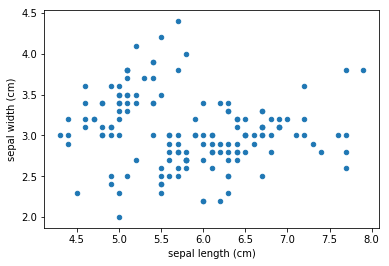

In [3]:
iris_df.plot.scatter(x="sepal length (cm)", y="sepal width (cm)")

## 7.1 Cluster the data using the KMeans implementation of scikit-learn!

* Resource: <http://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_iris.html>
* Measure the runtime for training the model!
* Experiment with different number of clusters! What are your observations!
* Plot the results!

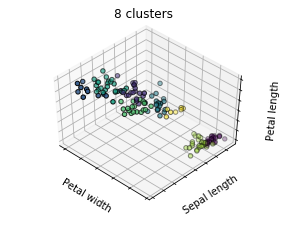

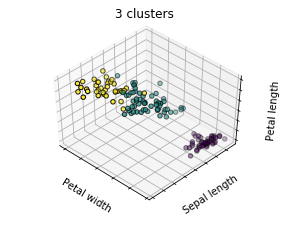

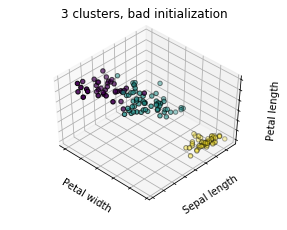

In [4]:
X = iris.data
y = iris.target

estimators = [('k_means_iris_8', KMeans(n_clusters=8)),
              ('k_means_iris_3', KMeans(n_clusters=3)),
              ('k_means_iris_bad_init', KMeans(n_clusters=3, n_init=1,
                                               init='random'))]

fignum = 1
titles = ['8 clusters', '3 clusters', '3 clusters, bad initialization']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(4, 3))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2],
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

Plot Ground Truth

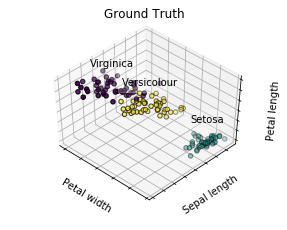

In [5]:
# Plot the ground truth
fig = plt.figure(fignum, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))

# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.set_title('Ground Truth')
ax.dist = 12
fig.show()

## 7.2 MLlib Clustering

* MLLib KMeans Example: 
    * <https://spark.apache.org/docs/latest/ml-clustering.html>
    * <https://spark.apache.org/docs/latest/api/python/>
    * <https://spark.apache.org/docs/latest/api/python/pyspark.ml.html#pyspark.ml.evaluation.ClusteringEvaluator>
* Run KMeans on the provided Iris dataset!
* Validate the quality of the model using the sum of the squared error for each point! Use the ClusterEvaluator of Spark MLlib!

In [6]:
# Initialize PySpark
os.environ["JAVA_HOME"]="/lrz/sys/compilers/java/jdk1.8.0_112"
APP_NAME = "PySpark Dataframes and Performance"
SPARK_MASTER="local[8]"

import pyspark
import pyspark.sql
from pyspark.sql import Row
conf=pyspark.SparkConf().setAppName(APP_NAME).set("spark.cores.max", "8")
sc = pyspark.SparkContext(master=SPARK_MASTER, conf=conf)
spark = pyspark.sql.SparkSession(sc).builder.appName(APP_NAME).getOrCreate()
print("PySpark initiated...")

PySpark initiated...


In [7]:
iris_sdf=spark.createDataFrame(iris_df)
iris_sdf=iris_sdf.withColumnRenamed("target" , "target_original")
iris_sdf=iris_sdf.withColumnRenamed("target_name" , "target_name_original")

In [8]:
iris_sdf.show(5)

+-----------------+----------------+-----------------+----------------+---------------+--------------------+
|sepal length (cm)|sepal width (cm)|petal length (cm)|petal width (cm)|target_original|target_name_original|
+-----------------+----------------+-----------------+----------------+---------------+--------------------+
|              5.1|             3.5|              1.4|             0.2|              0|              setosa|
|              4.9|             3.0|              1.4|             0.2|              0|              setosa|
|              4.7|             3.2|              1.3|             0.2|              0|              setosa|
|              4.6|             3.1|              1.5|             0.2|              0|              setosa|
|              5.0|             3.6|              1.4|             0.2|              0|              setosa|
+-----------------+----------------+-----------------+----------------+---------------+--------------------+
only showing top 5 

In [9]:
%time 
from pyspark.ml.feature import FeatureHasher
from pyspark.ml.feature import VectorAssembler
import pyspark.ml.clustering 
from pyspark.ml.evaluation import ClusteringEvaluator

#hasher = FeatureHasher(inputCols=["sepal length (cm)", "sepal width (cm)", "petal length (cm)", 
#                                  "petal width (cm)"],
#                       outputCol="features")

vecAssembler = VectorAssembler(inputCols=["sepal length (cm)", "sepal width (cm)", "petal length (cm)", 
                                  "petal width (cm)"], outputCol="features")
featurized = vecAssembler.transform(iris_sdf)

kmeans = pyspark.ml.clustering.KMeans(predictionCol='target').setK(3).setSeed(1)
model = kmeans.fit(featurized)
predictions = model.transform(featurized)

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 7.63 µs


In [10]:
predictions.show(3)

+-----------------+----------------+-----------------+----------------+---------------+--------------------+-----------------+------+
|sepal length (cm)|sepal width (cm)|petal length (cm)|petal width (cm)|target_original|target_name_original|         features|target|
+-----------------+----------------+-----------------+----------------+---------------+--------------------+-----------------+------+
|              5.1|             3.5|              1.4|             0.2|              0|              setosa|[5.1,3.5,1.4,0.2]|     0|
|              4.9|             3.0|              1.4|             0.2|              0|              setosa|[4.9,3.0,1.4,0.2]|     0|
|              4.7|             3.2|              1.3|             0.2|              0|              setosa|[4.7,3.2,1.3,0.2]|     0|
+-----------------+----------------+-----------------+----------------+---------------+--------------------+-----------------+------+
only showing top 3 rows



Print Cluster Centers

In [25]:
centers = model.clusterCenters()
print("Cluster Centers: ")
for center in centers:
    print(center)

Cluster Centers: 
[5.006 3.428 1.462 0.246]
[6.85       3.07368421 5.74210526 2.07105263]
[5.9016129  2.7483871  4.39354839 1.43387097]


#### Model Evaluation

* https://spark.apache.org/docs/latest/api/python/pyspark.ml.html#pyspark.ml.evaluation.ClusteringEvaluator

* Evaluator for Clustering results, which expects two input columns: prediction and features. The metric computes the Silhouette measure using the squared Euclidean distance.

In [14]:
from pyspark.ml.evaluation import ClusteringEvaluator
evaluator =  ClusteringEvaluator(predictionCol='target')
silhouette = evaluator.evaluate(predictions)
silhouette

0.735659605433223

## 7.3 Manual KMeans Clustering

Implement a KMeans Model using Spark MapReduce (Do Not use MLlib version!)!

In [15]:
from pyspark.mllib.linalg import Vectors, DenseVector
from pyspark.mllib.linalg.distributed import RowMatrix, Matrix
featurized.show(5)

+-----------------+----------------+-----------------+----------------+---------------+--------------------+-----------------+
|sepal length (cm)|sepal width (cm)|petal length (cm)|petal width (cm)|target_original|target_name_original|         features|
+-----------------+----------------+-----------------+----------------+---------------+--------------------+-----------------+
|              5.1|             3.5|              1.4|             0.2|              0|              setosa|[5.1,3.5,1.4,0.2]|
|              4.9|             3.0|              1.4|             0.2|              0|              setosa|[4.9,3.0,1.4,0.2]|
|              4.7|             3.2|              1.3|             0.2|              0|              setosa|[4.7,3.2,1.3,0.2]|
|              4.6|             3.1|              1.5|             0.2|              0|              setosa|[4.6,3.1,1.5,0.2]|
|              5.0|             3.6|              1.4|             0.2|              0|              setosa|[5.

In [16]:
featurized.dtypes

[('sepal length (cm)', 'double'),
 ('sepal width (cm)', 'double'),
 ('petal length (cm)', 'double'),
 ('petal width (cm)', 'double'),
 ('target_original', 'bigint'),
 ('target_name_original', 'string'),
 ('features', 'vector')]

Select feature column of dataframe that contains DenseVector

In [17]:
features = featurized.select("features")

Select three random points as initial centroids.

**Note:** Centroids are stored as local NumPy Array into Driver Memory

MapReduce based KMeans Implementation

In [44]:
from  sklearn.metrics.pairwise import pairwise_distances
from scipy.spatial.distance import cdist

clusters_centroids=featurized.select("features").rdd.takeSample(False, 3)
clusters_centroids_np=np.array([i["features"] for i in clusters_centroids])

def compute_distance(a, centroids):
    point = np.array(a["features"])
    point = np.expand_dims(point, axis=0)
    distances = cdist(point, centroids)
    closest_centroid = distances.argmin()
    return (closest_centroid, point)
    
def compute_avg(b):
    all_points = np.concatenate(list(b), axis=0)
    avg=all_points.mean(axis=0)
    return avg
    

for i in range(30):
    new_centroids=features.rdd.map(lambda a: compute_distance(a, clusters_centroids_np))\
                              .groupByKey()\
                              .mapValues(compute_avg)\
                              .collect()
    clusters_centroids_np=np.array([i[1] for i in new_centroids])

In [45]:
clusters_centroids_np

array([[6.85384615, 3.07692308, 5.71538462, 2.05384615],
       [5.88360656, 2.74098361, 4.38852459, 1.43442623],
       [5.006     , 3.428     , 1.462     , 0.246     ]])